In this portion, we will be attempting to combine both the university and rental data together. Afterwhich, we will be calculating the distance between the two places which will definitely be helpful for house hunting! Always better to know how far you will need to walk to school everyday :)

### Step 1: Importing Libraries

In [1]:
import pandas as pd
from math import sin, cos, sqrt, atan2, radians
import matplotlib.pyplot as plt
import seaborn as sns

uni = pd.read_excel('uni_toronto_final.xlsx')
rental = pd.read_excel('final_rental_data.xlsx')

In [2]:
uni.head()

,University,Country,City,Latitude,Longitude
0,University of Toronto,Canada,Toronto,43.663462,-79.397760
1,York University,Canada,Toronto,43.779242,-79.483559
2,Ryerson University,Canada,Toronto,43.658469,-79.378993
3,Humber College,Canada,Toronto,43.728512,-79.606250
4,Centennial College,Canada,Toronto,43.785792,-79.227810


In [4]:
rental.head()

,University,Address,Postal Code,latitude,longitude,Type,Price,Rental Name
0,University of Toronto,"Yonge St & Bloor St E, Toronto, M4W 0A8",M4W 0A8,43.6827,-79.3730,10 Beds,$625,Rental #1
1,University of Toronto,"St Clair Ave E & Midland Ave #Room, Toronto, M...",M1M 3E5,43.7247,-79.2312,Studio,$650,Rental #2
2,University of Toronto,"Mosedale Crescent & Kingslake Rd, Toronto, M2J...",M2J 3A3,43.7801,-79.3479,1 Bed,$670,Rental #3
3,University of Toronto,"Maywood Park & Garthwood Drive, Scarborough, O...",M1K 2H4,43.7298,-79.2639,Studio,$695,Rental #4
4,University of Toronto,"135 Leeward Glenway, Toronto, M3C 2Z6",M3C 2Z6,43.7334,-79.3329,4 Beds,$750,Rental #5


### Step 2: Combininig University and Rental datasets

In [5]:
df = rental.merge(uni, on = 'University')

In [6]:
# drop irrelevant columns
df.drop(columns = ['Country', 'City'], inplace = True)

In [7]:
# rename columns for better clarity
df.rename(columns = {'latitude': 'rental_lat', 'longitude': 'rental_long',
                    'Latitude': 'uni_lat', 'Longitude': 'uni_long'}, inplace = True)

In [8]:
df.head()

,University,Address,Postal Code,rental_lat,rental_long,Type,Price,Rental Name,uni_lat,uni_long
0,University of Toronto,"Yonge St & Bloor St E, Toronto, M4W 0A8",M4W 0A8,43.6827,-79.3730,10 Beds,$625,Rental #1,43.663462,-79.39776
1,University of Toronto,"St Clair Ave E & Midland Ave #Room, Toronto, M...",M1M 3E5,43.7247,-79.2312,Studio,$650,Rental #2,43.663462,-79.39776
2,University of Toronto,"Mosedale Crescent & Kingslake Rd, Toronto, M2J...",M2J 3A3,43.7801,-79.3479,1 Bed,$670,Rental #3,43.663462,-79.39776
3,University of Toronto,"Maywood Park & Garthwood Drive, Scarborough, O...",M1K 2H4,43.7298,-79.2639,Studio,$695,Rental #4,43.663462,-79.39776
4,University of Toronto,"135 Leeward Glenway, Toronto, M3C 2Z6",M3C 2Z6,43.7334,-79.3329,4 Beds,$750,Rental #5,43.663462,-79.39776


### Step 3: Calculating the distance between two points

To calculate the distance between coordinates, we can use Haversine Formula to do that. To learn more, you can read the post here: https://andrew.hedges.name/experiments/haversine/

https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

In [9]:
# approximate radius of earth in km
R = 6373.0

for index, rows in df.iterrows():
    
    r_lat = float(rows['rental_lat'])
    r_long = float(rows['rental_long'])
    u_lat = float(rows['uni_lat'])
    u_long = float(rows['uni_long'])
    
    lat1 = radians(r_lat) # latitude of the rental
    lon1 = radians(r_long) # longitude of the rental
    lat2 = radians(u_lat) # latitude of the uni
    lon2 = radians(u_long) # latitude of the uni

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = round(R * c)
    
    df.loc[index,'Distance (km)'] = distance

In [10]:
df.head()

,University,Address,Postal Code,rental_lat,rental_long,Type,Price,Rental Name,uni_lat,uni_long,Distance (km)
0,University of Toronto,"Yonge St & Bloor St E, Toronto, M4W 0A8",M4W 0A8,43.6827,-79.3730,10 Beds,$625,Rental #1,43.663462,-79.39776,3.0
1,University of Toronto,"St Clair Ave E & Midland Ave #Room, Toronto, M...",M1M 3E5,43.7247,-79.2312,Studio,$650,Rental #2,43.663462,-79.39776,15.0
2,University of Toronto,"Mosedale Crescent & Kingslake Rd, Toronto, M2J...",M2J 3A3,43.7801,-79.3479,1 Bed,$670,Rental #3,43.663462,-79.39776,14.0
3,University of Toronto,"Maywood Park & Garthwood Drive, Scarborough, O...",M1K 2H4,43.7298,-79.2639,Studio,$695,Rental #4,43.663462,-79.39776,13.0
4,University of Toronto,"135 Leeward Glenway, Toronto, M3C 2Z6",M3C 2Z6,43.7334,-79.3329,4 Beds,$750,Rental #5,43.663462,-79.39776,9.0


Awesome! We manage to get the distance from the rental to the Univeristy. Let's take a look at the distribution using seaborn to have a better understanding on the average distance.

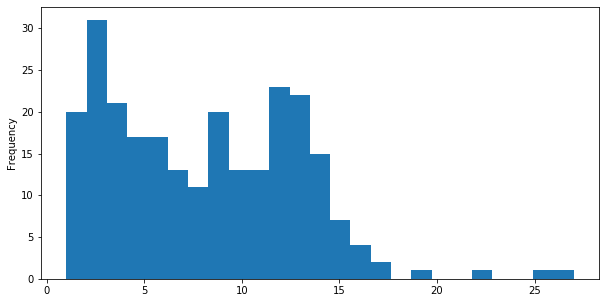

In [11]:
df['Distance (km)'].plot(kind = 'hist', bins = 25, figsize = (10,5))

Based on the graph, the distance is mainly distributed between 1 - 9 km with a few of them ranging from 12 - 14km away.

In [12]:
df.groupby('Distance (km)').count()[['University']]

,University
Distance (km),
1.0,8
2.0,12
3.0,31
4.0,21
5.0,17
6.0,17
7.0,13
8.0,11
9.0,20


In [13]:
# Save dataframe
df.to_excel('uni_rental_data.xlsx', index = None)